In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import shutil
from google.colab import files

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from skimage import io

wind_path = '/content/drive/MyDrive/Raw data for the wind climate change project'
wind_files = [f for f in os.listdir(wind_path) if f.endswith('.csv')]
pressure_path = '/content/drive/MyDrive/Raw data for the pressure climate change project'
pressure_files = [f for f in os.listdir(pressure_path) if f.endswith('.csv')]



day10


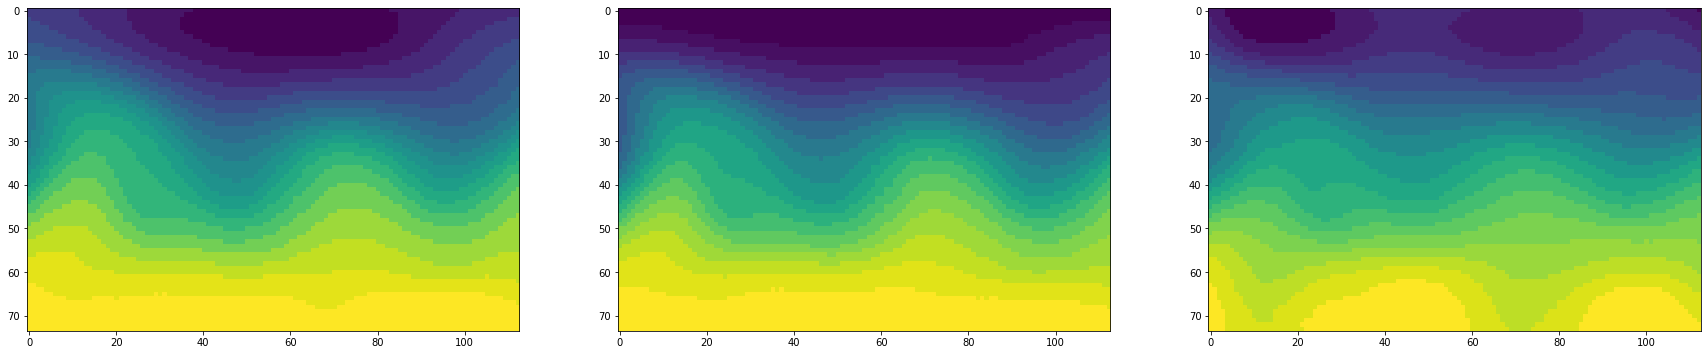




day15


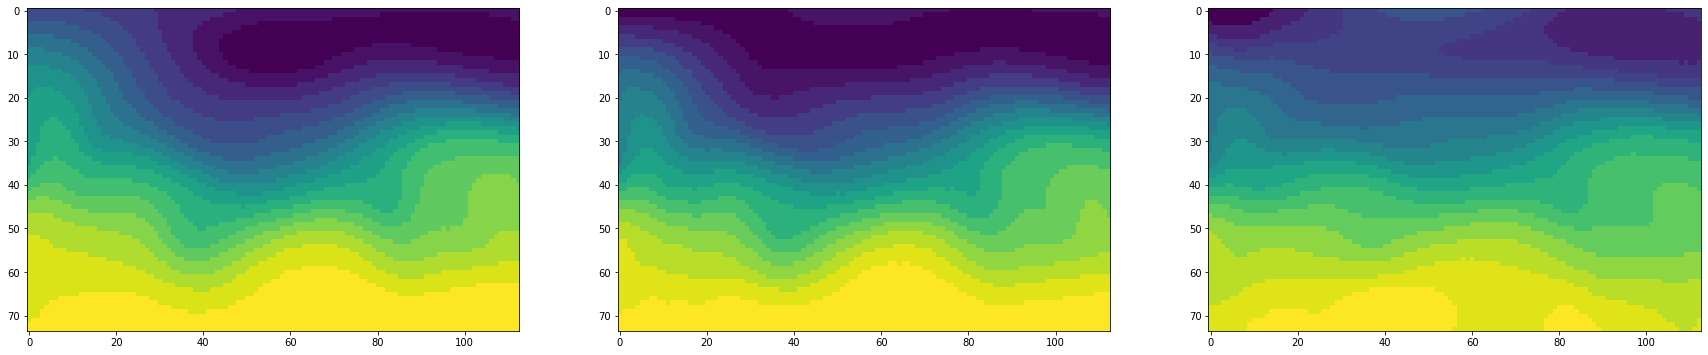




day17


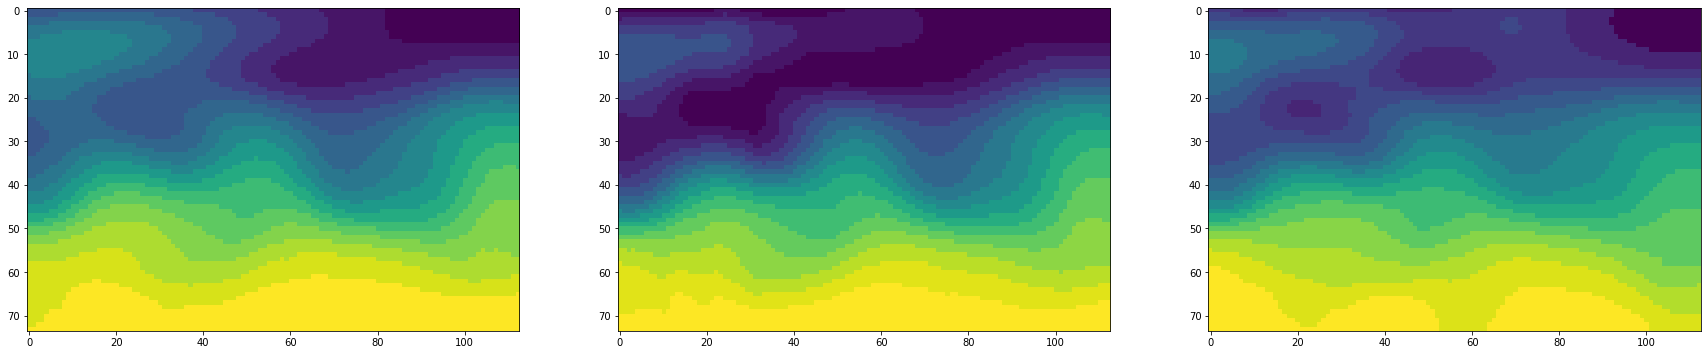




day18


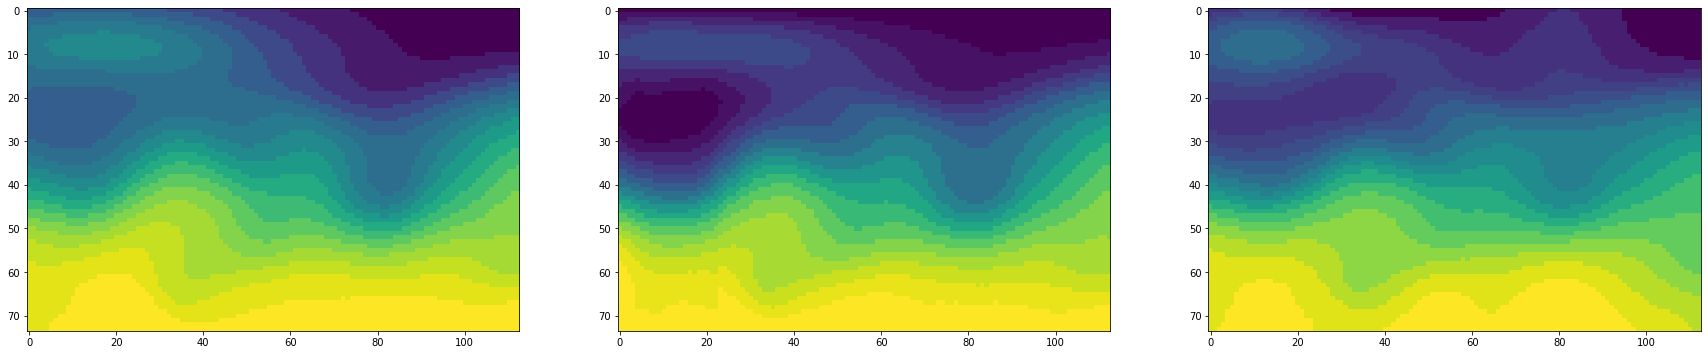




day16


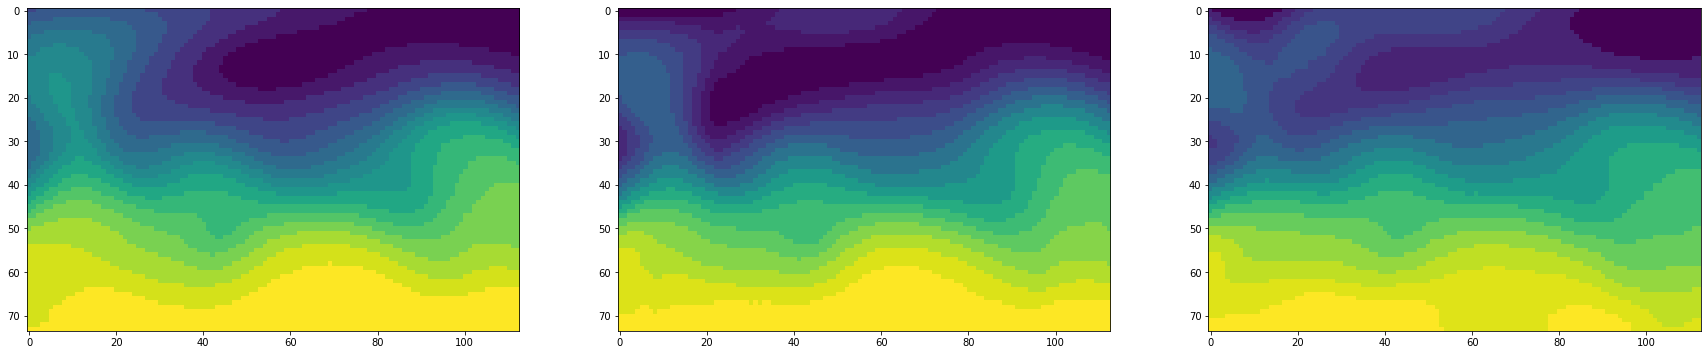




day11


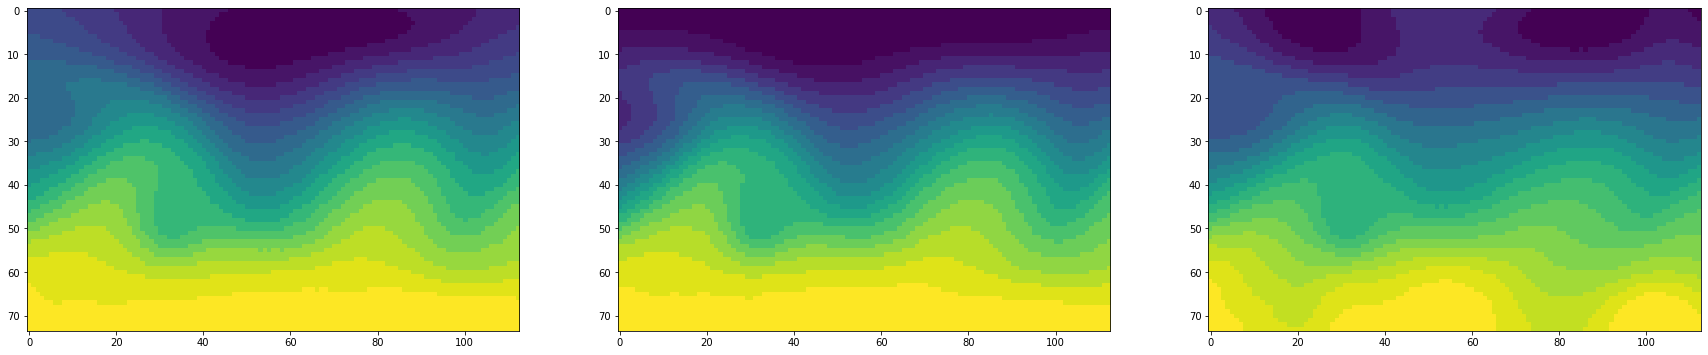




day14


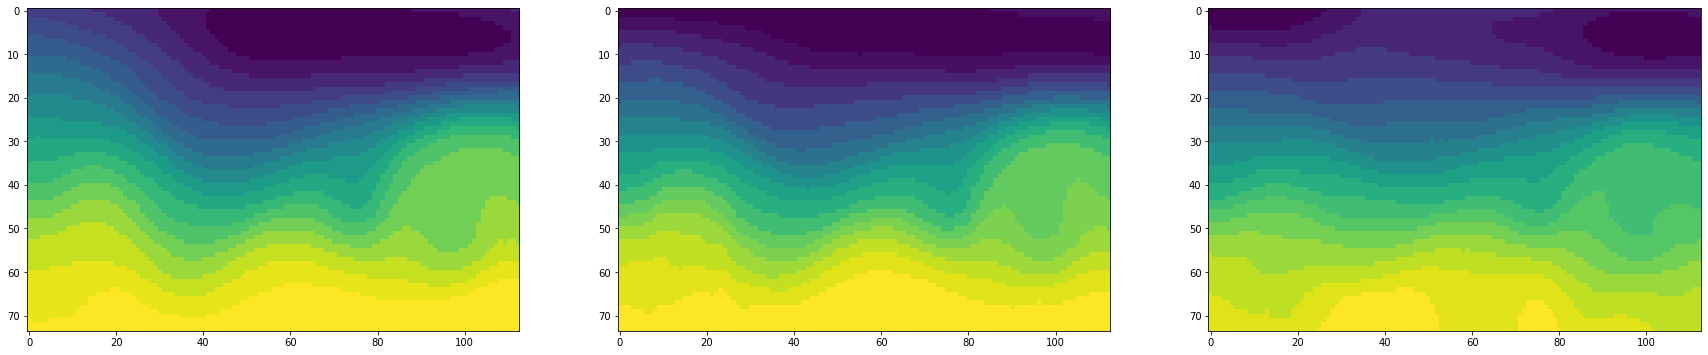




day12


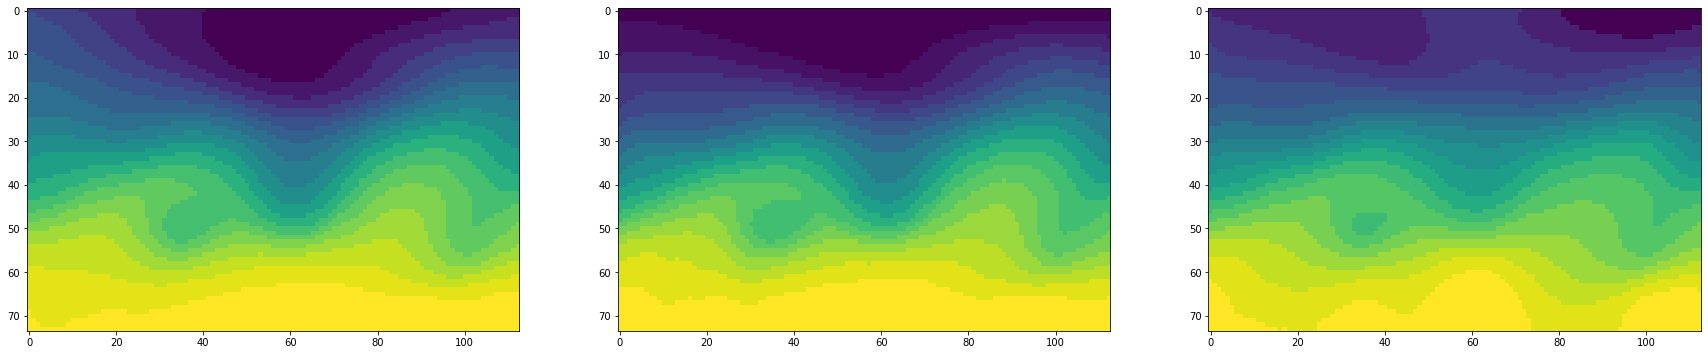




day13


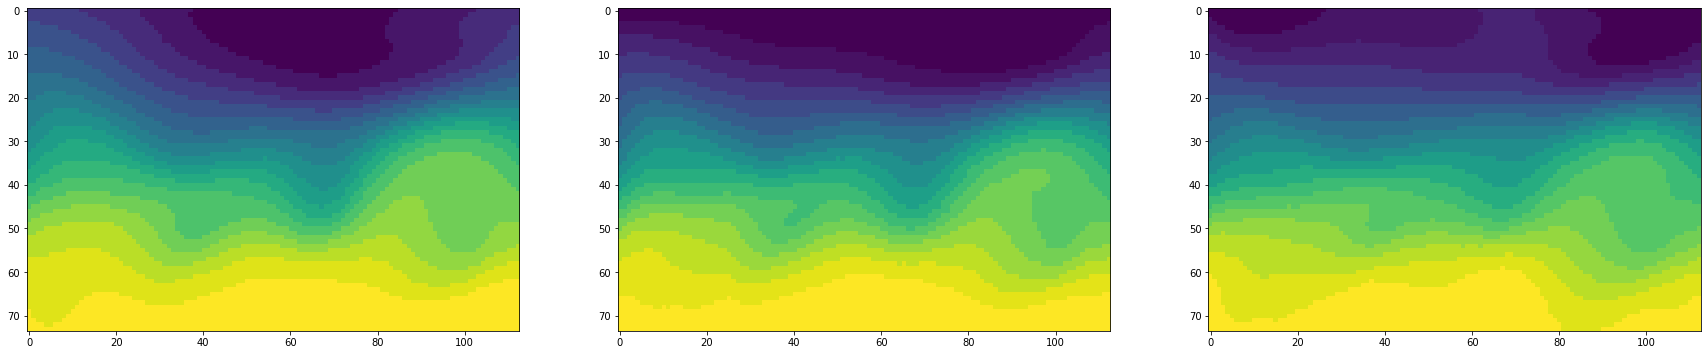




day20


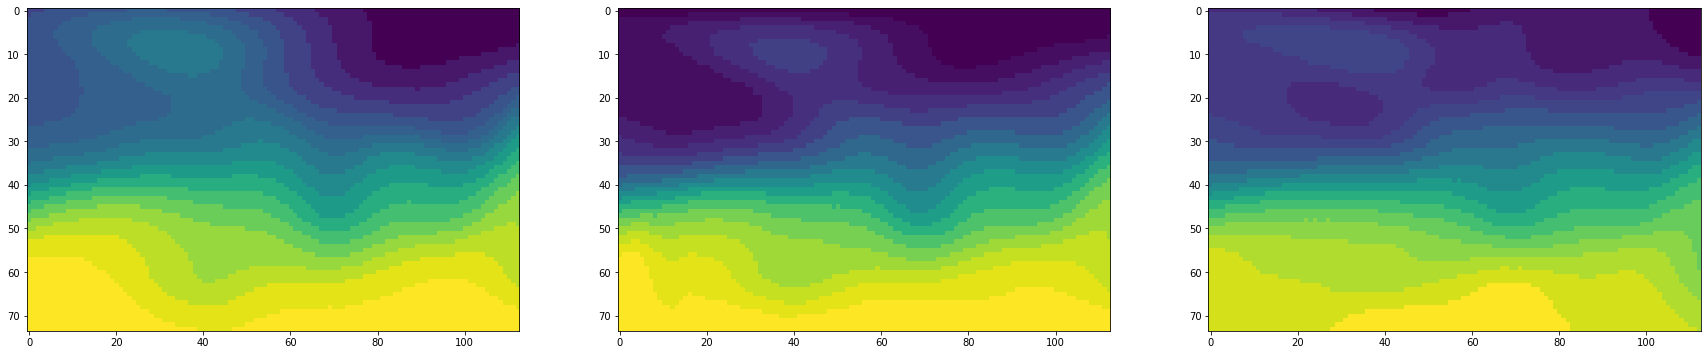




day5


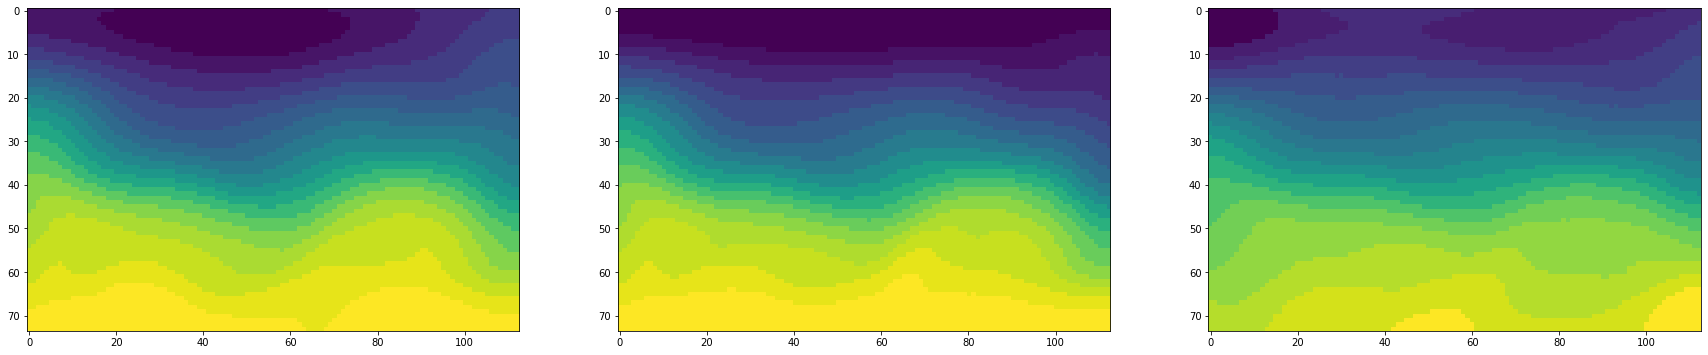




day4


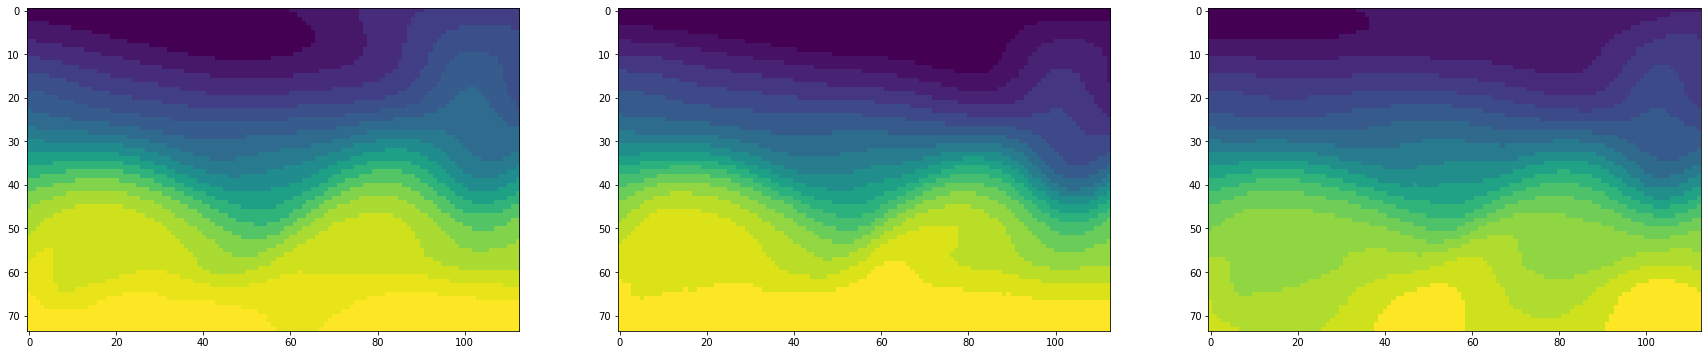




day3


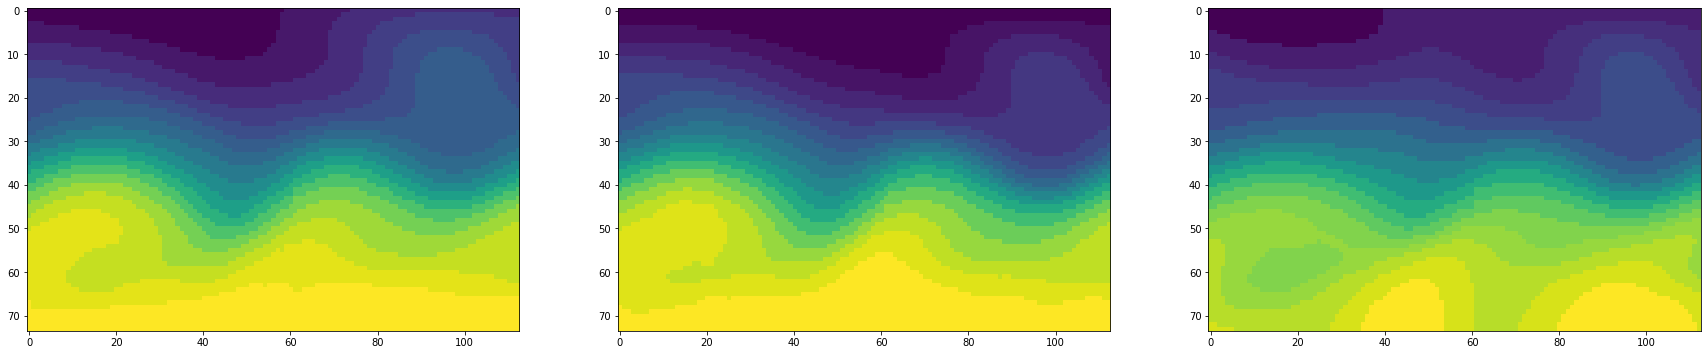




day19


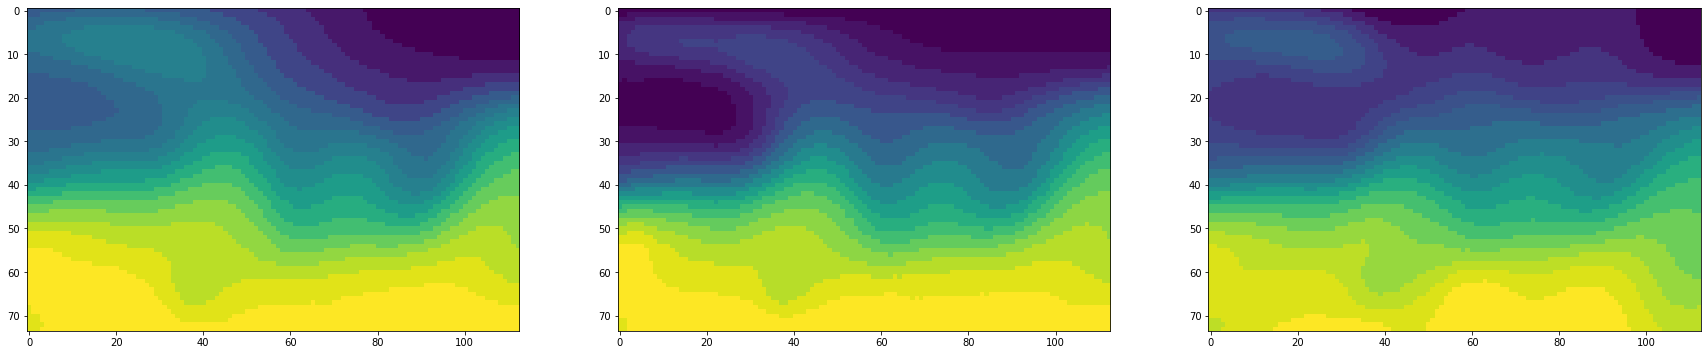




day6


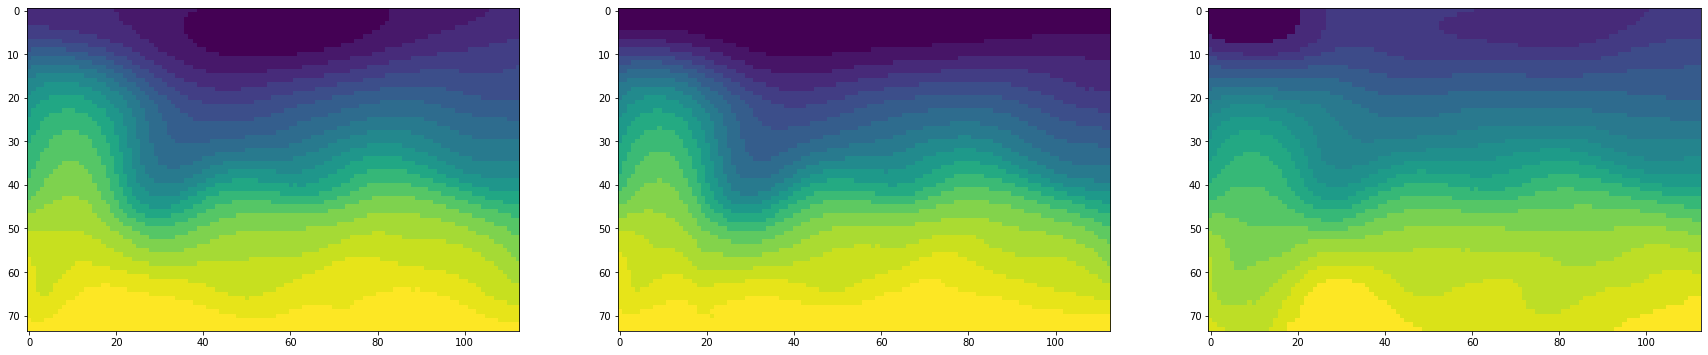




day2


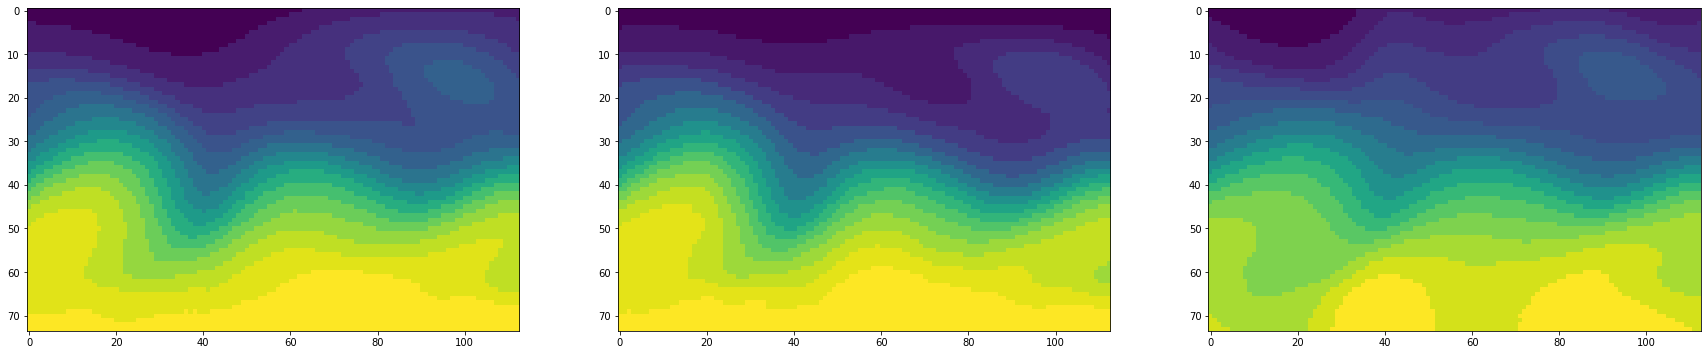




day7


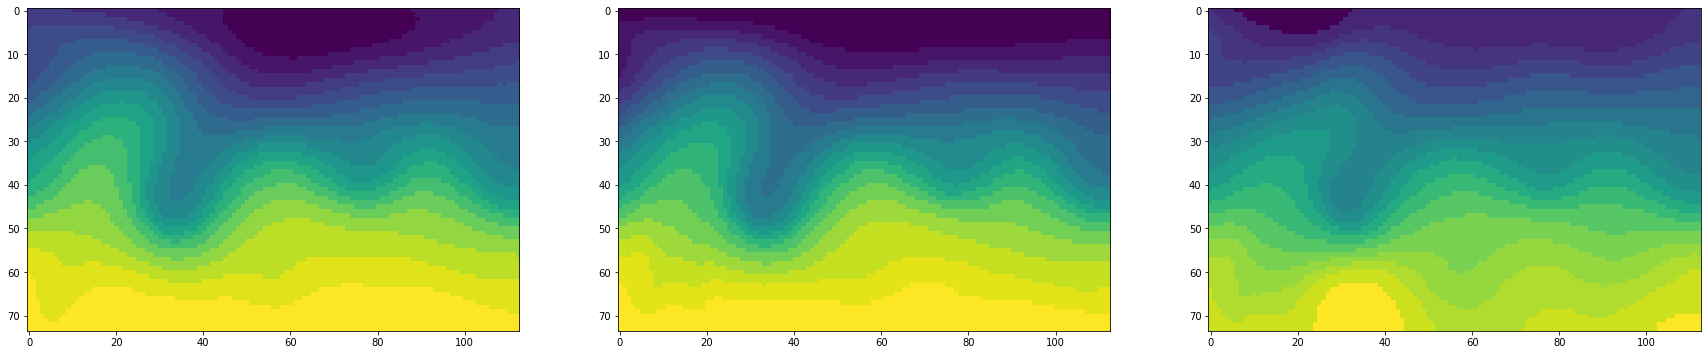




day8


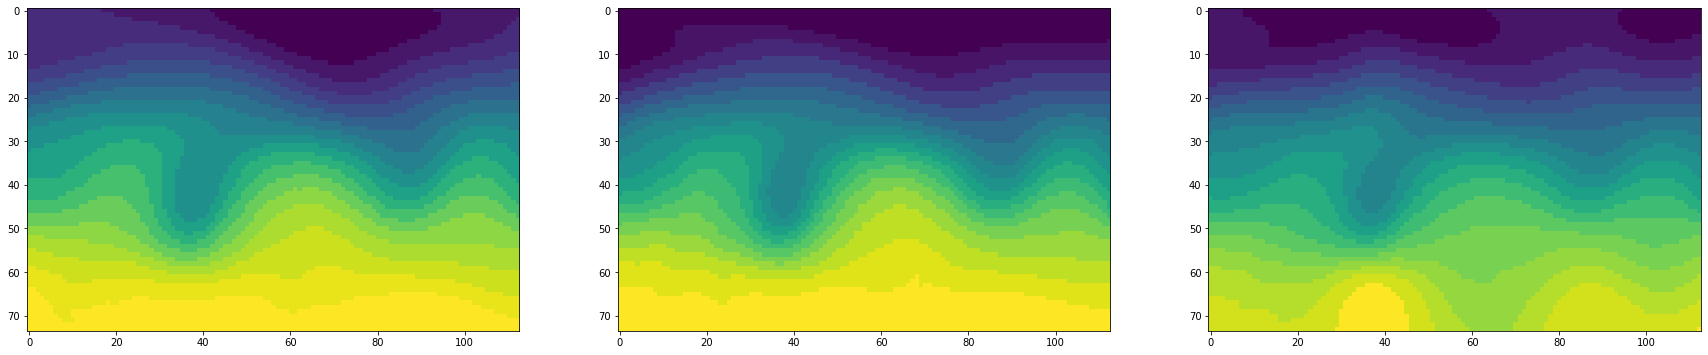




day9


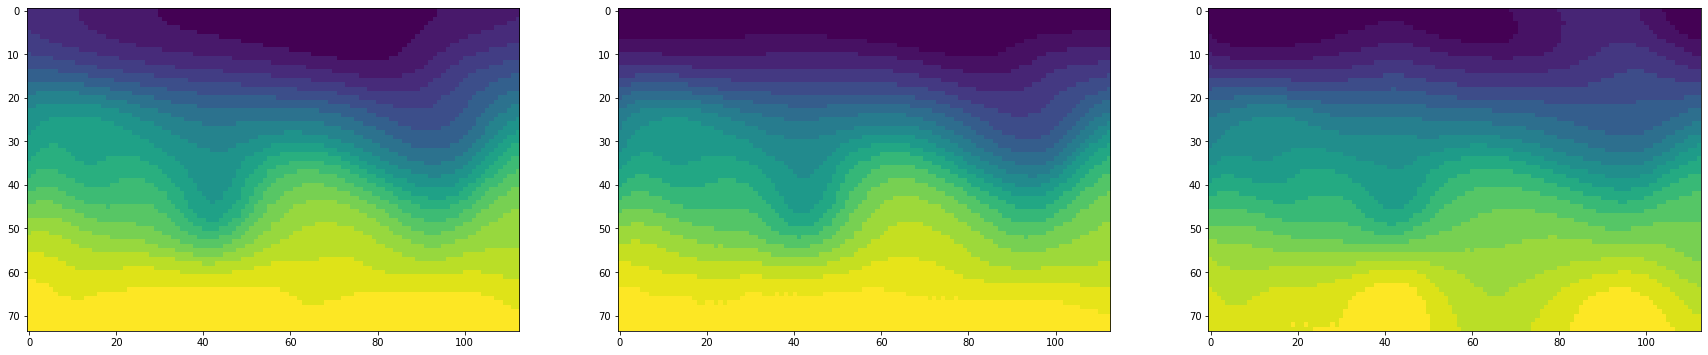




day1


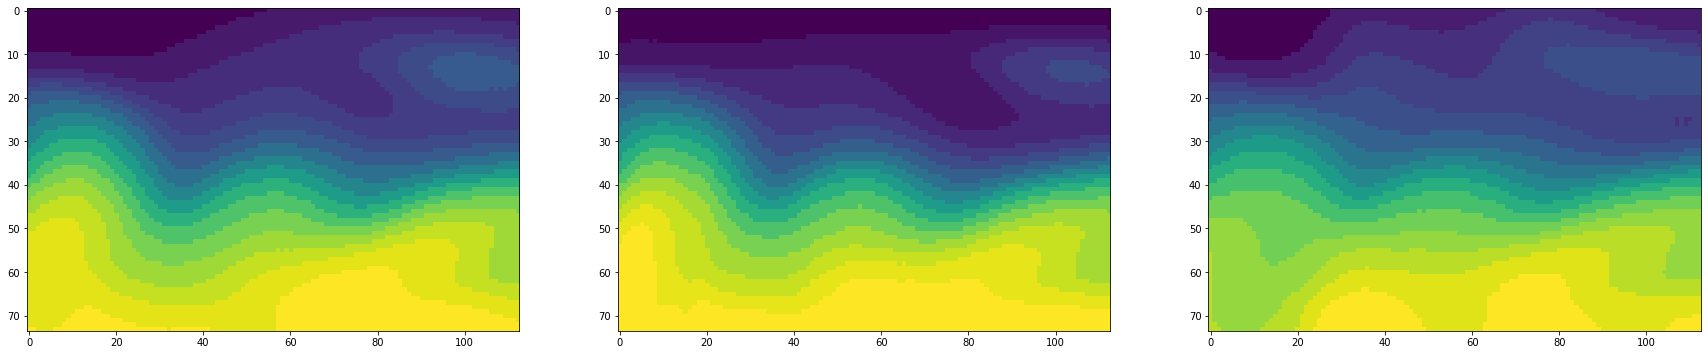




day135


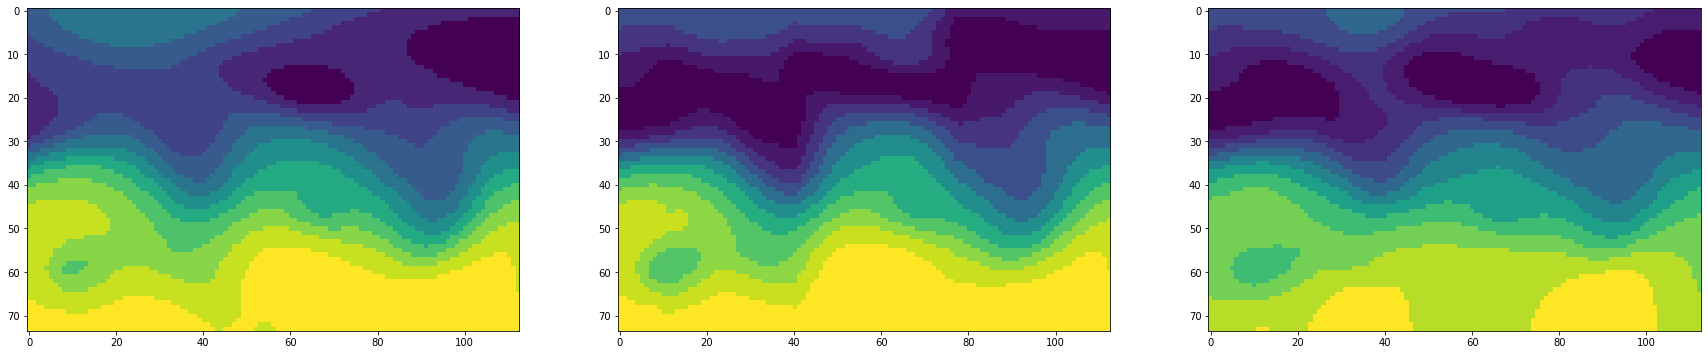




day279


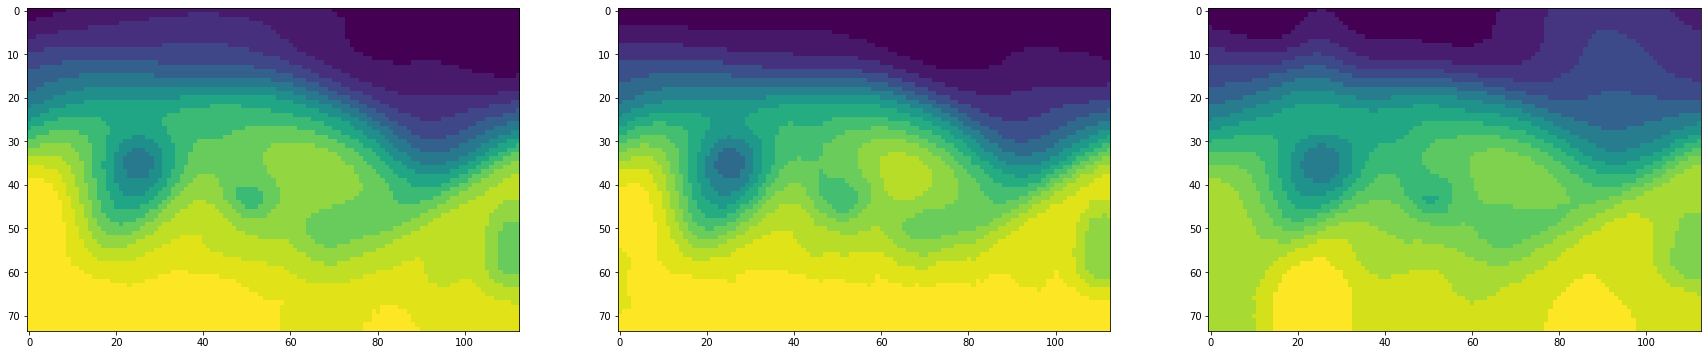

In [ ]:
for file in pressure_files:
    df = pd.read_csv(os.path.join(pressure_path, file), header=None)
    dot_index = file.index(".")
    print(f'{file[:dot_index]}')
    min = df.min().min()
    max = df.max().max()

    cluster = round((max-min)/100)
    
    X = np.array(df).reshape(-1,1)
    #show original image
    kmeans_org = KMeans(n_clusters = cluster)
    kmeans_org.fit(X)

    labels_org = kmeans_org.labels_
    centroids_org = kmeans_org.cluster_centers_ 
    
    colors = centroids_org.round(0).astype(int)
    img_org = colors[labels_org].reshape(df.shape)
    img_org = np.flip(img_org, 0)

    #show MinMaxScaler image
    from sklearn.preprocessing import MinMaxScaler
    minmax_scaler = MinMaxScaler()
    minmax_scaler.fit(np.array(df))
    df_minmax = minmax_scaler.transform(np.array(df))
    df_minmax = df_minmax.reshape(-1,1)

    kmeans_minmax = KMeans(n_clusters = cluster)
    kmeans_minmax.fit(df_minmax)
    labels_minmax = kmeans_minmax.labels_
    centroids_minmax = kmeans_minmax.cluster_centers_

    img_minmax = centroids_minmax[labels_minmax].reshape(df.shape)
    img_minmax = np.flip(img_minmax, 0)

    #show StandardScaler image
    from sklearn.preprocessing import StandardScaler
    standard_scaler = StandardScaler()
    standard_scaler.fit(np.array(df))
    df_standard = standard_scaler.transform(np.array(df))
    df_standard = df_standard.reshape(-1,1)

    kmeans_standard = KMeans(n_clusters = cluster)
    kmeans_standard.fit(df_standard)
    labels_standard = kmeans_standard.labels_
    centroids_standard = kmeans_standard.cluster_centers_

    img_standard = centroids_standard[labels_standard].reshape(df.shape)
    img_standard = np.flip(img_standard, 0)

    #show all 3 images
    fig, axes = plt.subplots(1,3, figsize = (30, 12))
    axes[0].imshow(img_org)
    axes[1].imshow(img_minmax)
    axes[2].imshow(img_standard)

    plt.show()
    
    folder_path = "Image for pressure data after processing"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_path = os.path.join(folder_path, f"{file[:dot_index]}.png")
    fig.savefig(file_path)
    print(end = "\n\n\n")

day10


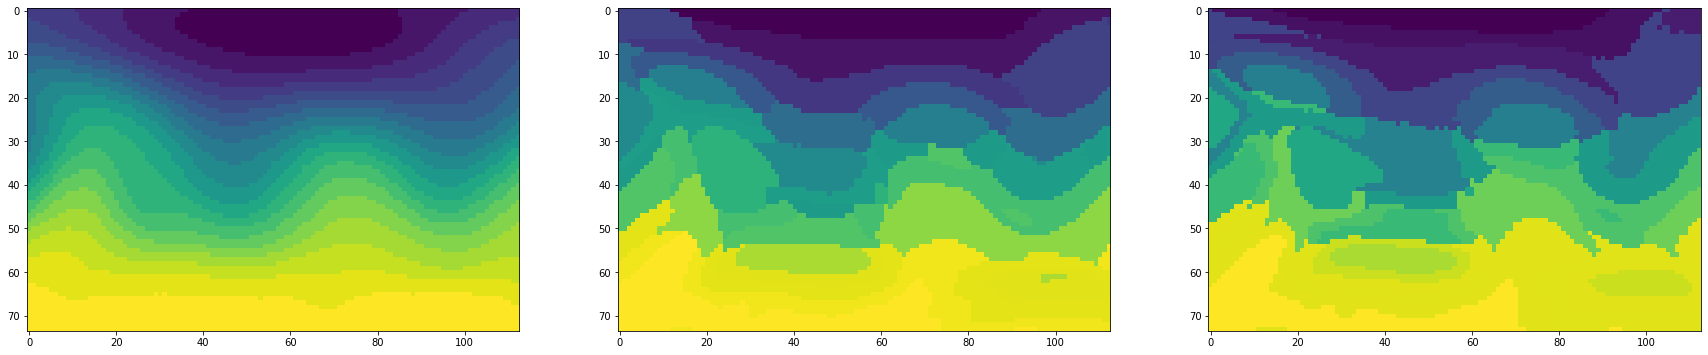




day15


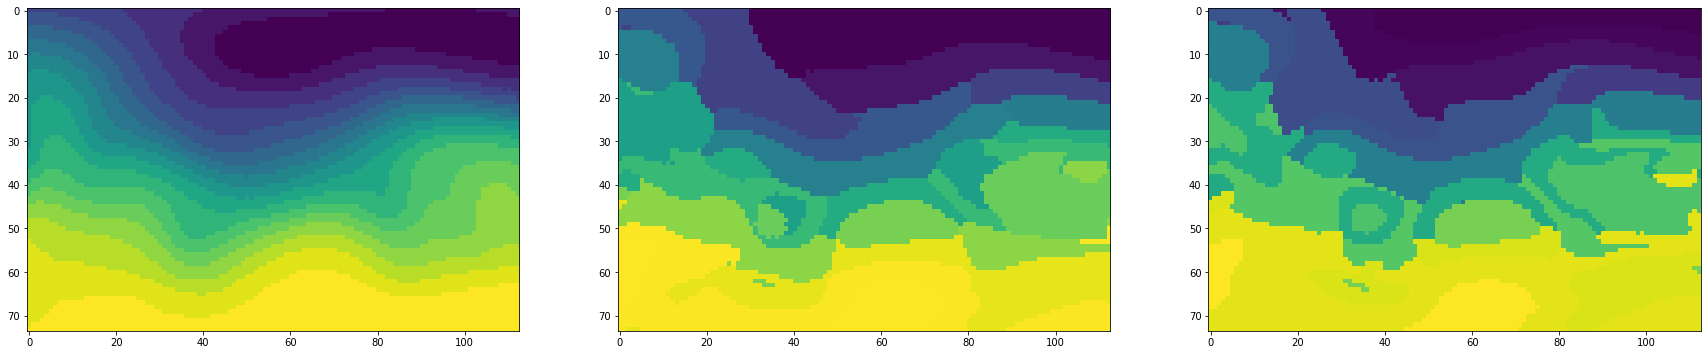




day17


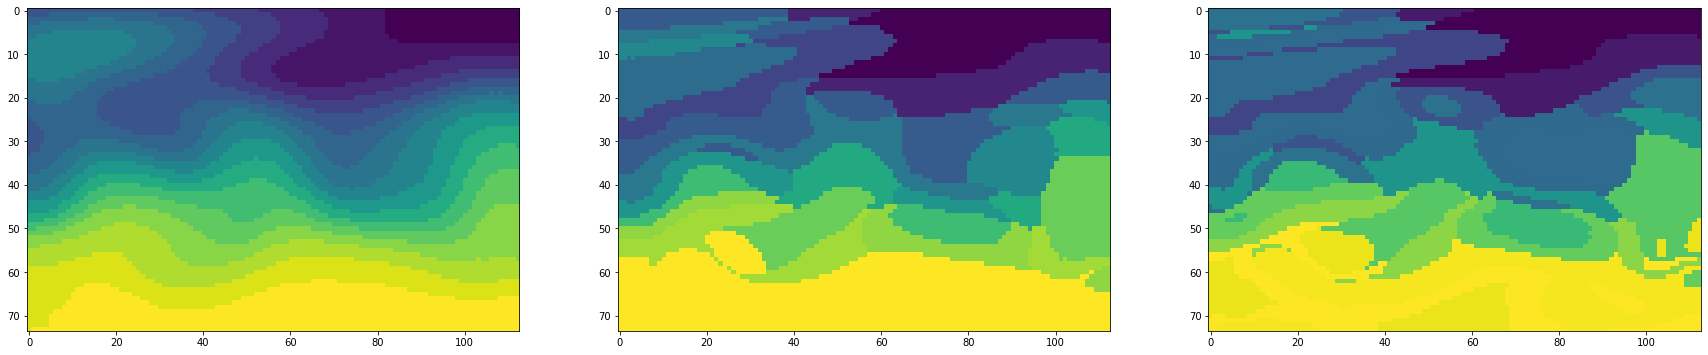




day18


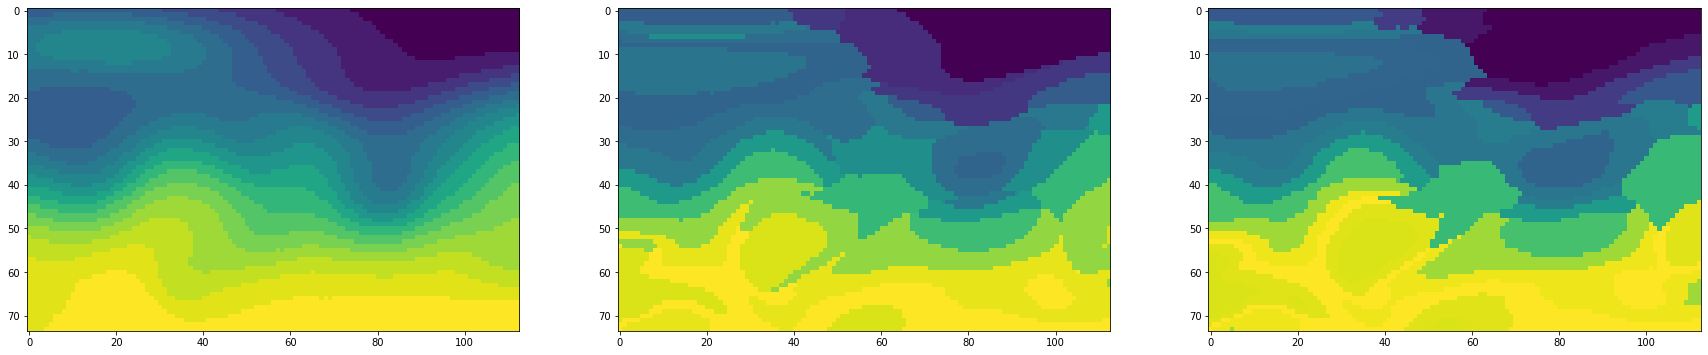




day16


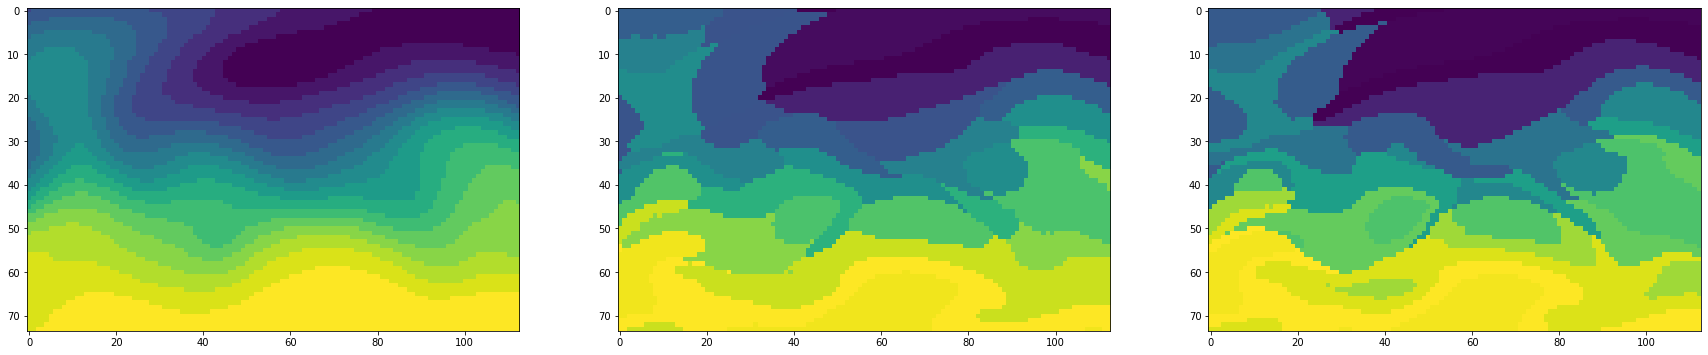




day11


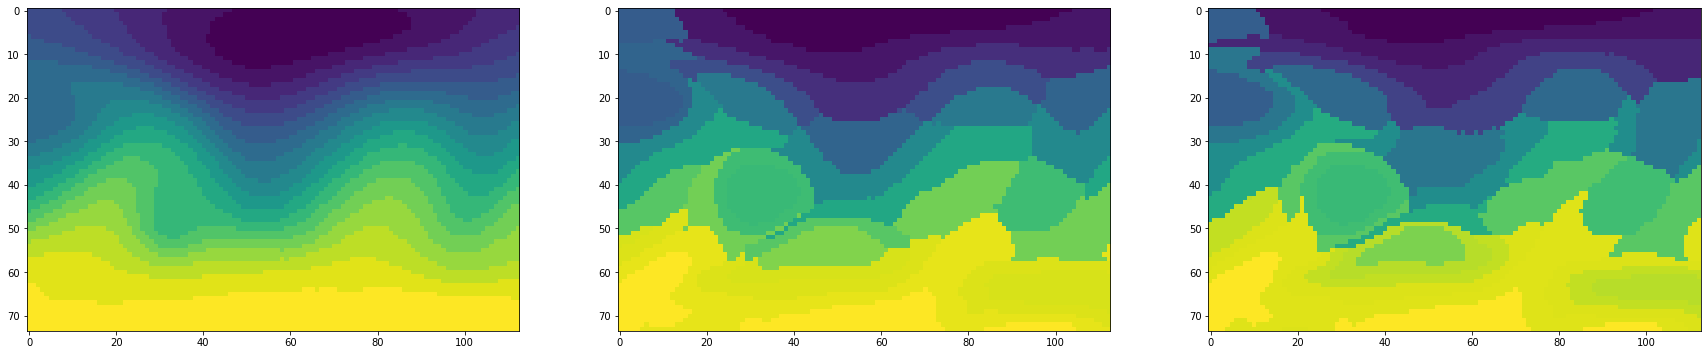




day14


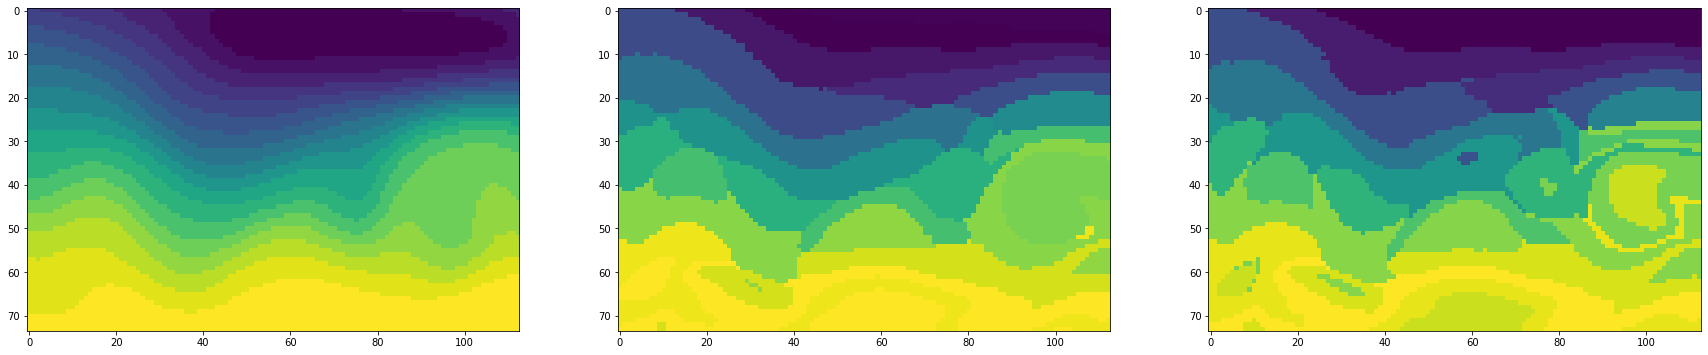




day12


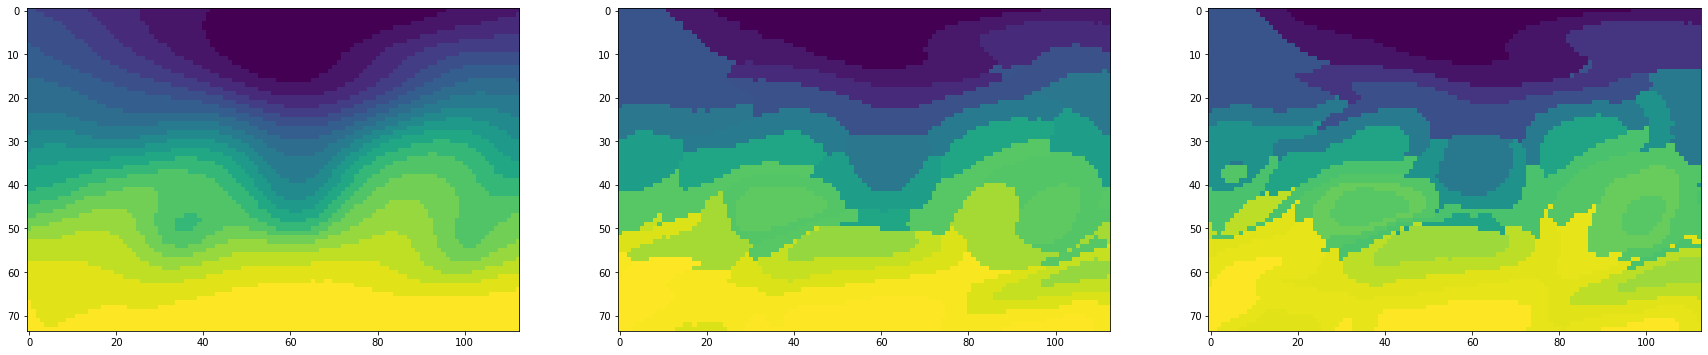




day13


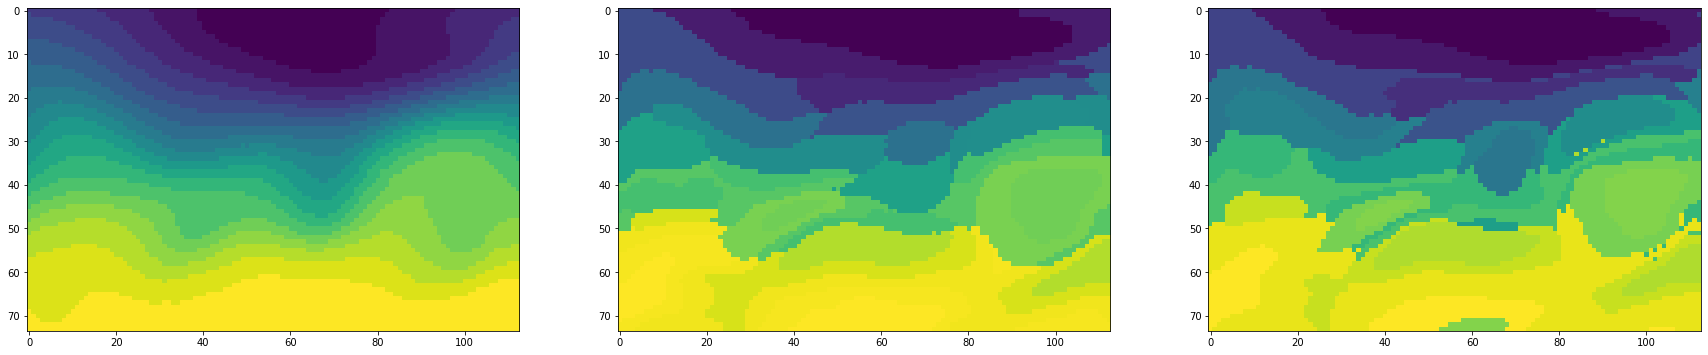




day20


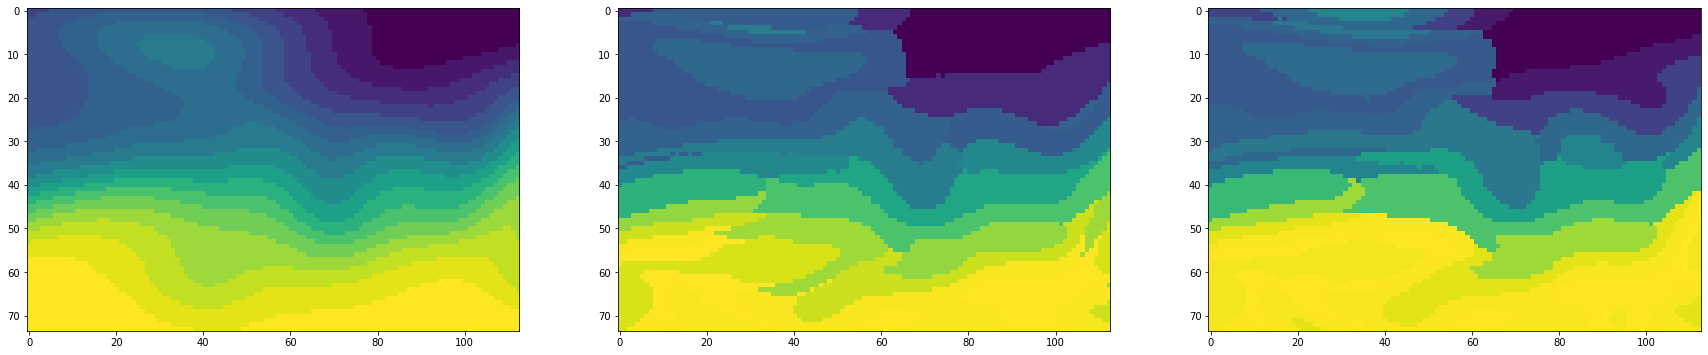




day5


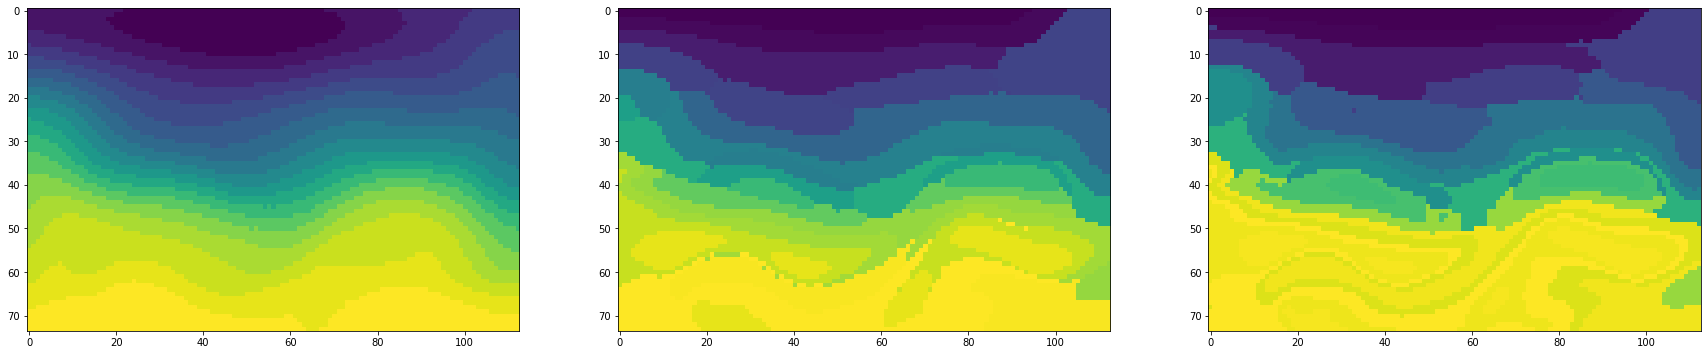




day4


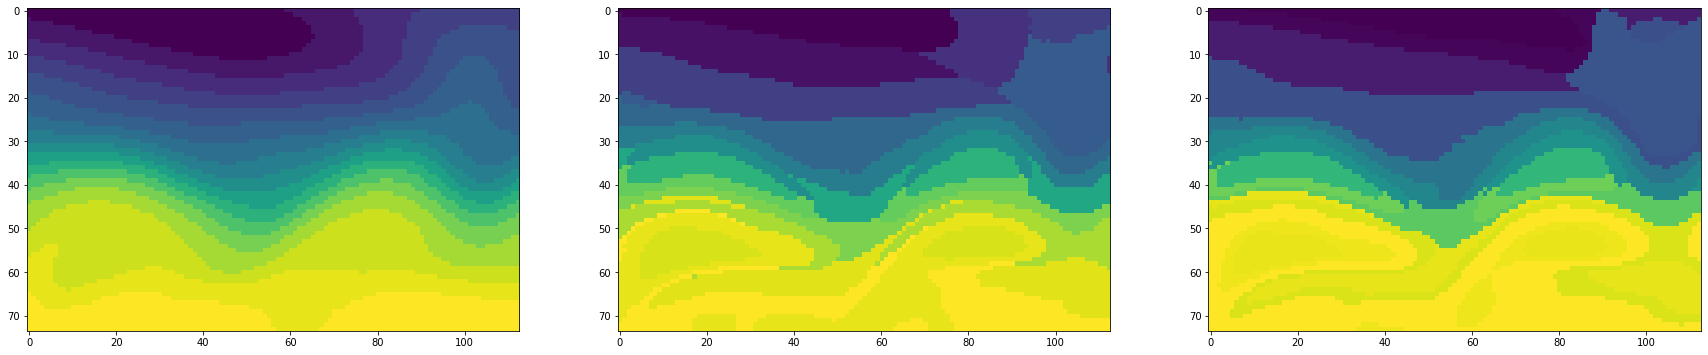




day3


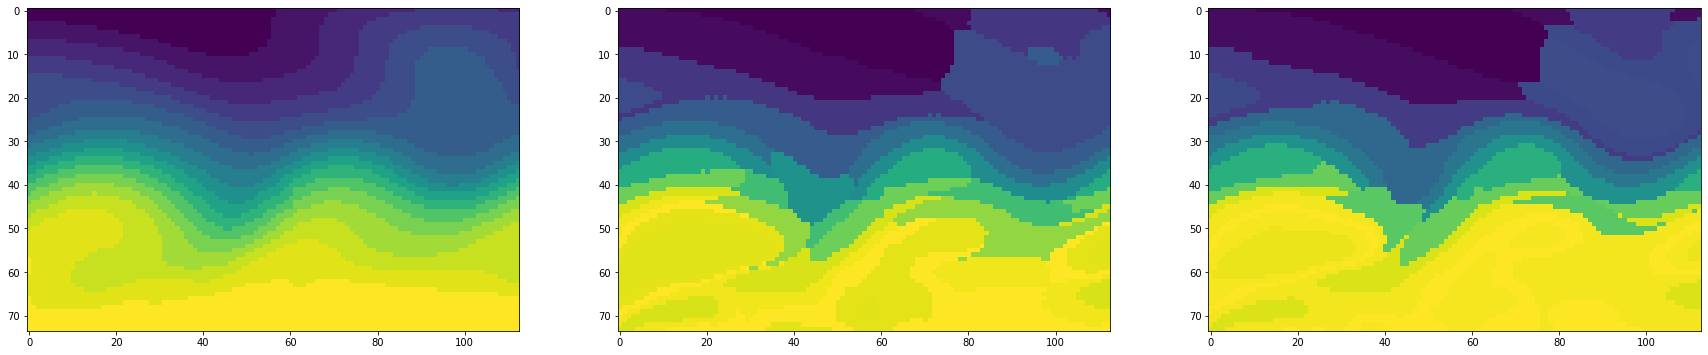




day19


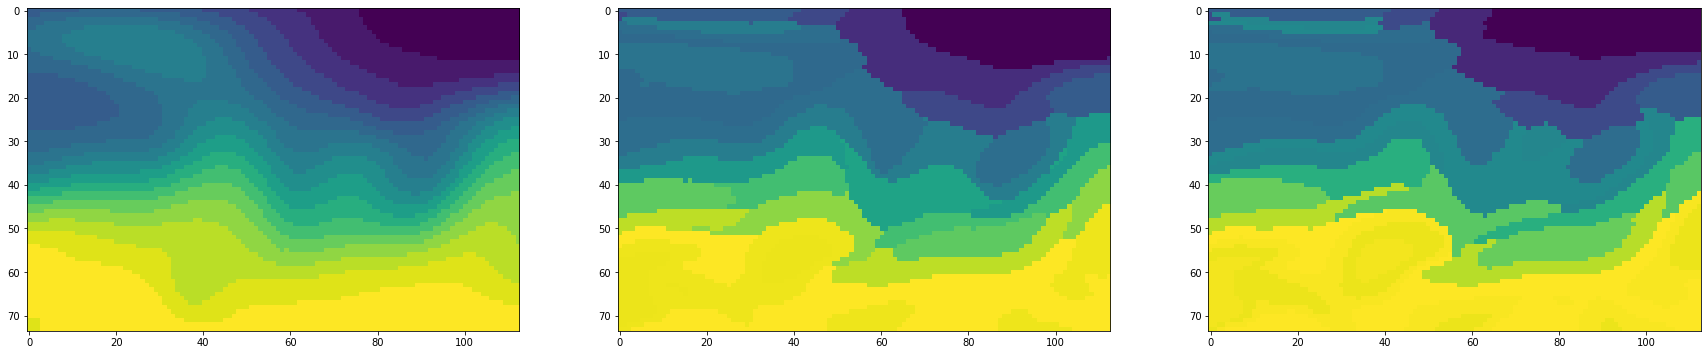




day6


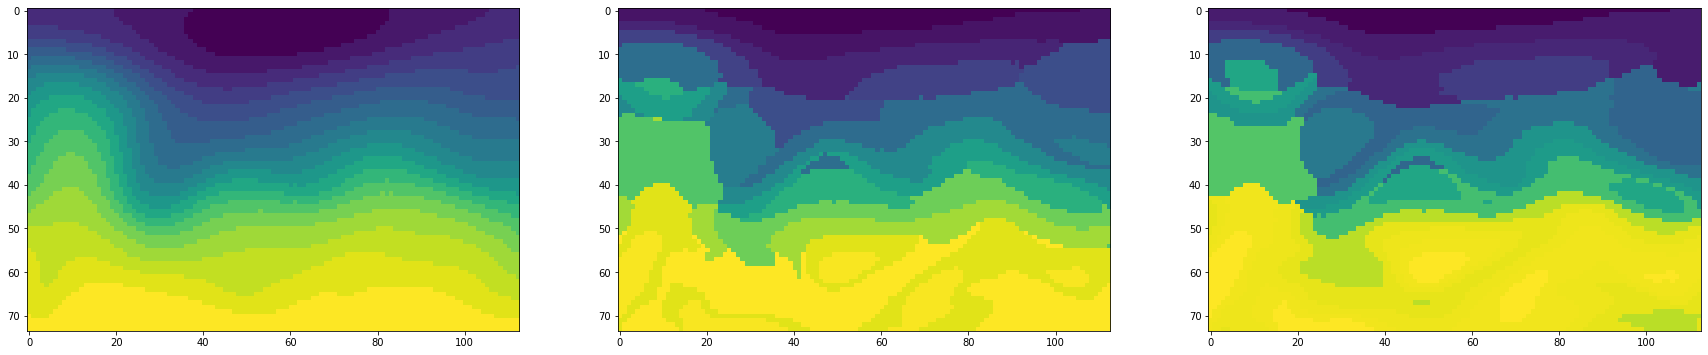




day2


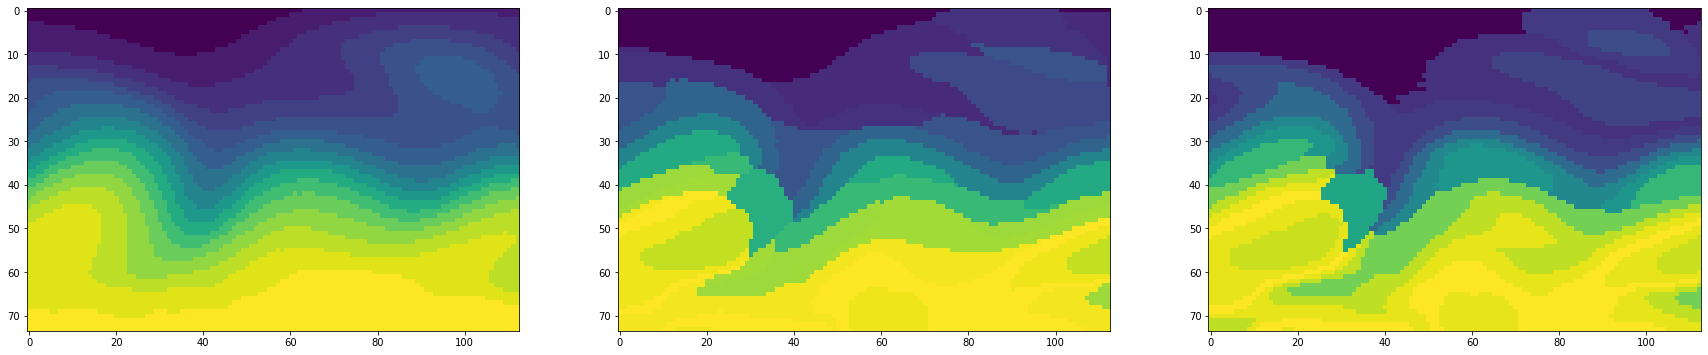




day7


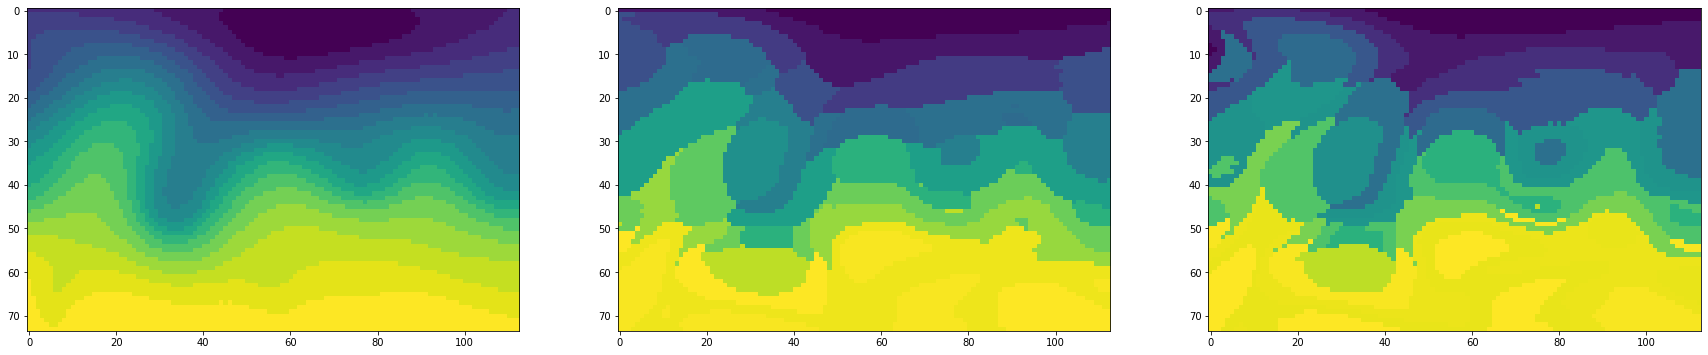




day8


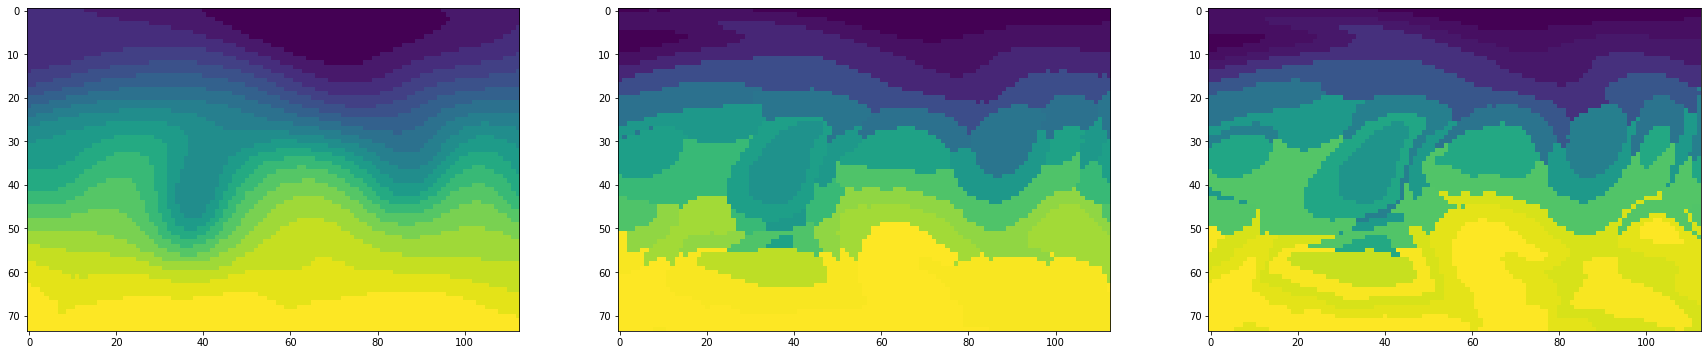




day9


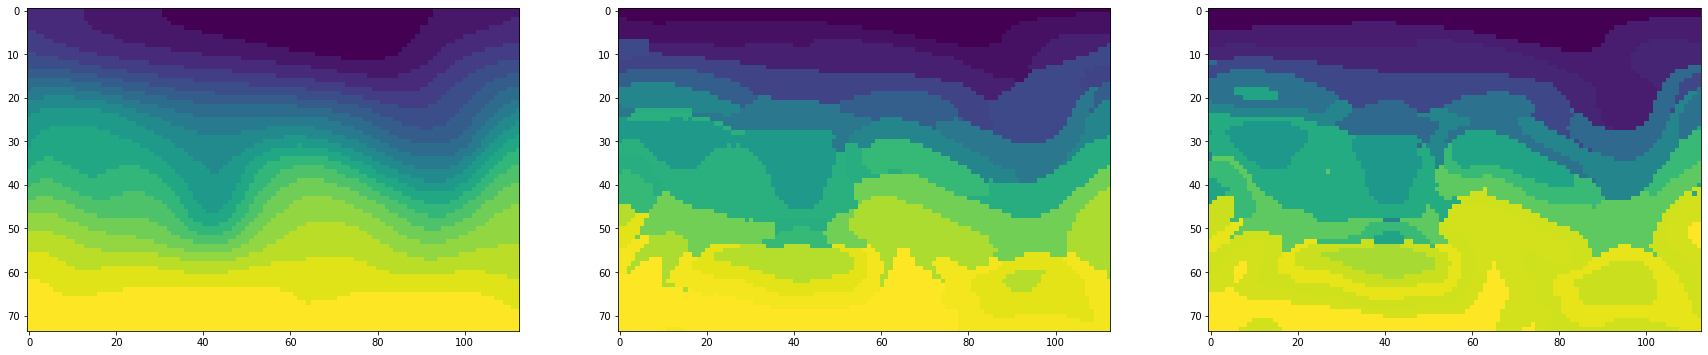




day1


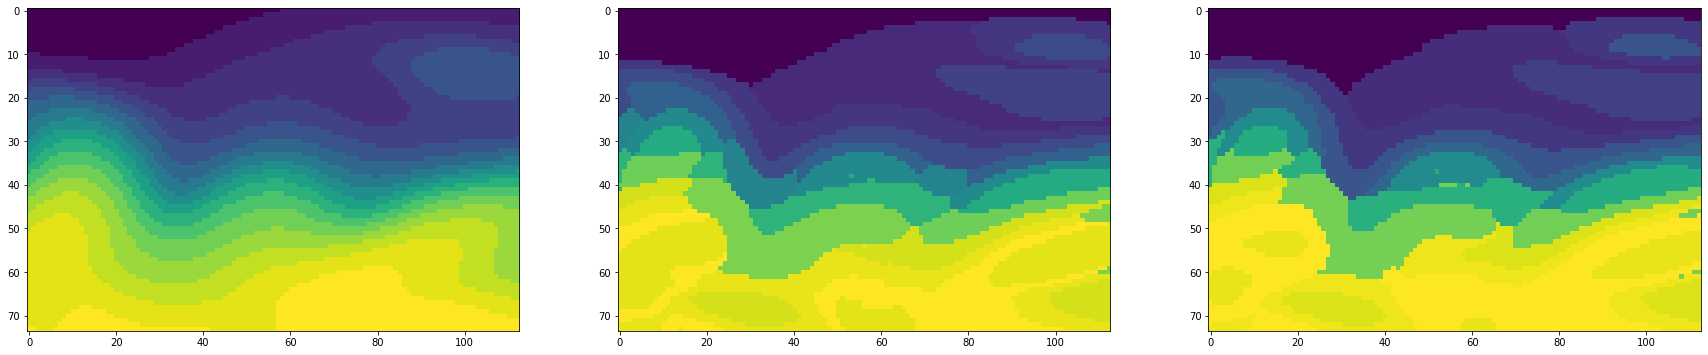




day135


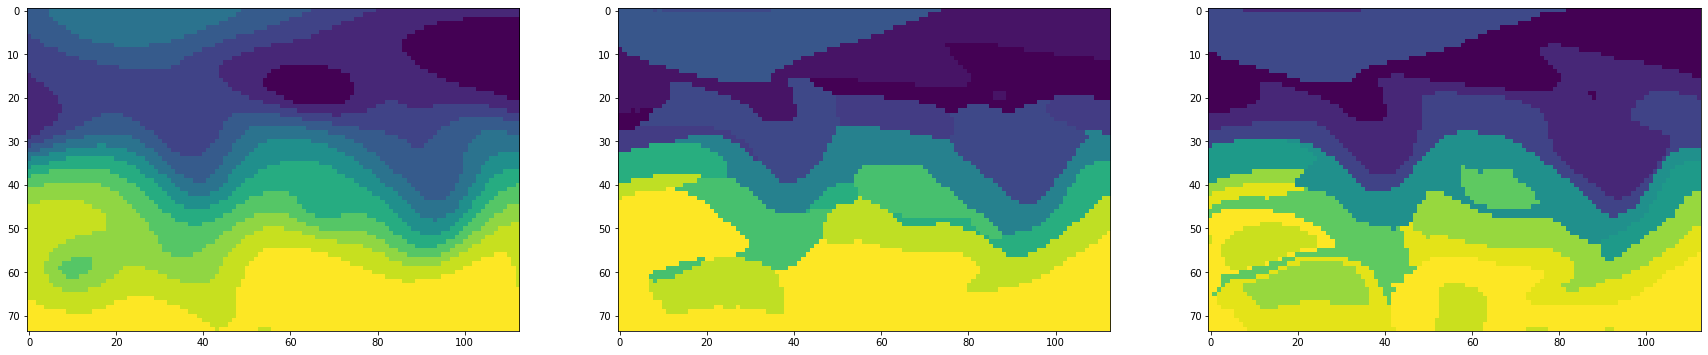




day279


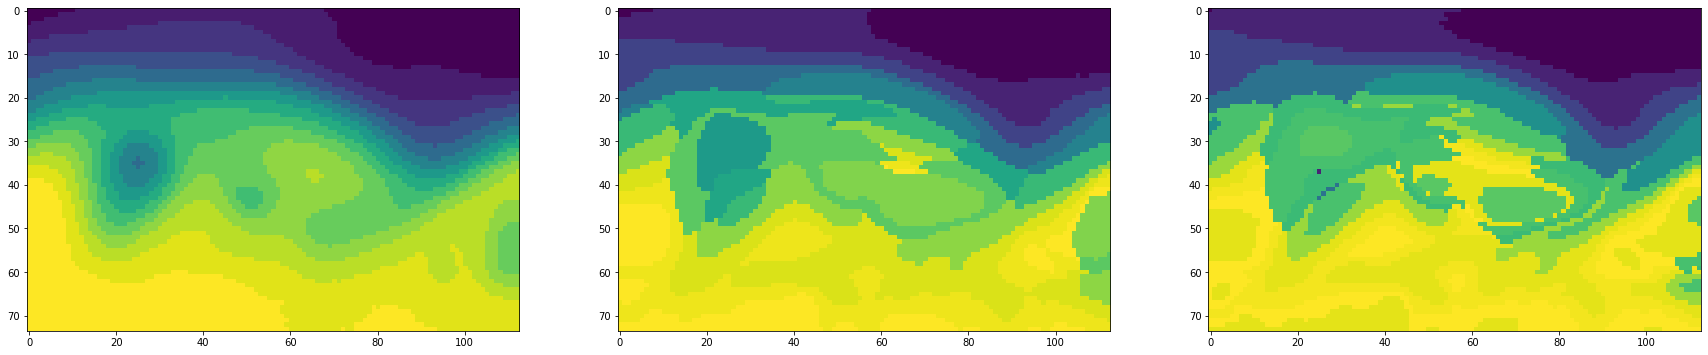

In [ ]:
# Combine the wind data with pressure data for model training
for prs_file in pressure_files:
    for w_file in wind_files:
        if w_file == prs_file:
            pressure_df = pd.read_csv(os.path.join(pressure_path, prs_file), header = None)
            wind_df = pd.read_csv(os.path.join(wind_path, w_file), header = None)
            dot = w_file.index(".")
            print(f"{w_file[:dot]}")
            max = pressure_df.max().max()
            min = pressure_df.min().min()

            cluster = round((max - min)/100)

            df_array = np.stack((np.array(pressure_df), np.array(wind_df)), axis = 2)

            (h, w, c) = df_array.shape
            img2D = df_array.reshape(h*w, c)

            #show original image 
            kmeans = KMeans(n_clusters = cluster)
            cluster_labels = kmeans.fit_predict(img2D)

            centroids = kmeans.cluster_centers_
            colors = centroids.round(0).astype(int)

            img = np.reshape(colors[cluster_labels], (h, w, c))
            
            #show MinMaxScaler image
            from sklearn.preprocessing import MinMaxScaler
            n_minmax_scaler = MinMaxScaler()
            n_minmax_scaler.fit(img2D)

            n_df_minmax = n_minmax_scaler.transform(img2D)

            kmeans = KMeans(n_clusters = cluster)
            cluster_labels = kmeans.fit_predict(n_df_minmax)
            n_centroids = kmeans.cluster_centers_
            n_img_minmax = np.reshape(n_centroids[cluster_labels], (h,w,c))

            #Show StandardScaler image
            from sklearn.preprocessing import StandardScaler
            n_standard_scaler = StandardScaler()
            n_standard_scaler.fit(img2D)

            n_df_standard = n_standard_scaler.transform(img2D)

            kmeans = KMeans(n_clusters = cluster)
            cluster_labels = kmeans.fit_predict(n_df_standard)
            n_centroids = kmeans.cluster_centers_
            n_img_std = np.reshape(n_centroids[cluster_labels], (h,w,c))

            #show all 3 images
            fig, n_axes = plt.subplots(1,3, figsize = (30, 12))
            n_axes[0].imshow(np.flip(img[:,:,0], 0))
            n_axes[1].imshow(np.flip(n_img_minmax[:,:,0], 0))
            n_axes[2].imshow(np.flip(n_img_std[:,:,0], 0))
            plt.show()

            folder_path = "Image for pressure and wind data after processing"
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
            file_path = os.path.join(folder_path, f"{w_file[:dot]}.png")
            fig.savefig(file_path)
            print(end = "\n\n\n")


In [ ]:
folder_path = '/content/Image for pressure data after processing'

# Create a zip file of the folder
zip_file_path = shutil.make_archive('Image for pressure data after processing', 'zip', folder_path)

# Download the zip file
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
folder_path1 = '/content/Image for pressure and wind data after processing'

# Create a zip file of the folder
zip_file_path1 = shutil.make_archive('Image for pressure and wind data after processing', 'zip', folder_path1)

# Download the zip file
files.download(zip_file_path1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>